# Introduction: Credit Card Fraud Detection

Scratch notebook in familiarizing myself with methods to handle unbalanced data with Python then build a binary classification model to predict credit card frauds. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase, and I actually had some fraud purchases happen not too long ago on myself as well but it was not flagged by the bank.

Goal here is to review methods in the preprocessing/cleaning data, unbalanced dataset solutions for modleing, and review the classification process.

*_Note: Codes may also come from other sources for practice/workflow. Informational links have been added at the bottom of the notebook._

-------------

## What else do I hope to achieve from this?

Develop a stronger understanding in data cleaning, understand why data is missing, how to work with unbalanced data which is normal in real world situations, and review methods on classification methods to combat this issue. I also want to utilize PCA, feature selection, and sklearn's pipeline function more often so I will attempt to use it on this dataset as well.

I also follow the same methodology and attempt to improve on it as much as I can on each project. See link [here](https://github.com/davidtnly/Python/tree/master/MachineLearning) for public notebooks.

Answer some of these questions below:
- What kind of machine learning algorithms are good against unbalanced datasets?
- What are the risks in our modeling and evaluation methods?
- Is my modeling process efficient with the use of pipeline() and is the EDA process useful? 
- What's SMOTE, Undersampling and Oversampling?
- How do I do all of this above in Python?

-------------

## Framing the problem

Can you identify fraudulent credit card transactions?

### Data

The data comes from the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset on Kaggle.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project.

Please take a look at the Works Cited below for any additional information. They are all informative and gives you another perspective in working with machine learning and deep learning in the financial field.

-------------

## Machine Learning Framework

As always, here's a ML framework I like to follow or reference back to whenever I work on a project.

1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use
2. Collecting relevant information and data
    - What type of data do we have?
    - Can we use any complimentary data with that is public that will help our with our analysis/modeling?
    - What other data requirements are there?
    - What is considered a success for this problem?
    - What libraries do we need?
        - How do we know if our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away?
    - Can the data be plotted?
    - What changes do we need in order to make the data usable if it's not already?
    - This step is not really an isolated step as it can encompass exploratory, feature engineering + more
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Model development & scoring
    - Splitting the data into train and test sets
        - Always make sure you have a completely separate data to test your final model on after hyperparameter tuning and training has been done
        - Think about your experimental design beforehand so that you minimize unrelated sources of variation and reduce as much data leakage (if any) as possible
    - Normalizing the data to be on similar scales
        - Normalization, standardization methods (Z-score, minmax, median)
    - Create baseline, pre-tuned, and tuned models (includes cross-validation)
        - Create easy to more complex models if needed (think about computational cost, complexity, explainability)
    - Hyperparameter tuning
    - Fit cross-validated tuned models using best hyperparameters
    - Score model and get results
8. Evaluation
    - How accurate are the models?
        - Are the models overfitting or underfitting?
    - What evaluation metric are we using?
    - Is the final model good enough?
    - Which features are important?
    - Iterate steps if we are proceeding with specific features selected
        - Dimensionality reduction methods (PCA, LDA) to see if we can reduce model complexity (this step can be before modeling as well)
9. Results
    - What's our conclusion?
    - What actions are we going to take?
10. Ending notes
    - Extra information that we may not go over like steps that we did not go into or missed
        - Any other possible methods/solutions that we could look at in the future

-------------

## Method of Evaluation

Since this is a binary classification problem, we will start our baseline model using a logistic regression algorithm. 

The evaluation method will be the AUPRC score which is the recommended method. AUPRC is the area under the curve where X is recall and Y is precision. This is a better measure to seek a balance between precision and recall vs. accuracy especially when there there is a higher risk in misclassifying a purchase as the bank's risk is a lot higher when it is not classified correctly or on time. Precision-Recall curves also should be used when there is a moderate to large class imbalance

Here are some performance metrics used in the confusion matrix below:

- TP - correct positive prediction
- TN - correct negative prediction
- FP - Type I Error (case negative but predicted positive)
- FN - Type II Error (case positive but predicted negative)
- Precision - how accurate is the model of those predicted positive that are actually positive
    - TP/(TP + FP)
- Recall / Sensitivity / TPR (True Positive Rate) - how many actual positives the model labeled over the total positives
    - TP/(TP + FN) which is also TP/All P
- Specificity (True Negative Rate) - number of correct negative predictions
    - TN/(TN + FP) which is also TN/All N
- F1 Score - weighted average of TPR (Recall) and Precision, useful if there is uneven class distribution like cancer detection where there can be 10,000 negatives and only 1 positive or if there is a higher risk if false negatives or false positives
    - 2 * ( (Pr * Rc) / (Pr + Rc) )
- ROC Curve
    - Graph used to summarize the performance at various thresholds by plotting the TPR against FPR
    
    
#### Methods
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1 = f1_score(y_true, yhat)
    auc = auc(recall, precision)

-------------

## Overview of the Modeling Process

In order to see if fraud is detected or not, we will use multiple classification algorithms to predict the outcome of 0 (negative) or 1 (positive). The employed classifiers are logistic regression, decision trees, random forest, support vector machines, and extreme gradient boosting. 

After each performance of the machine learning method, we will begin evaluation where we will use 10-fold cross-validation as well, which is simply a procedure used to evaluate ML models where data is limited. In the cross-validation, data is resampled to best test our evaluation metric then averaged to get an overall score.

-------------

### Import libraries

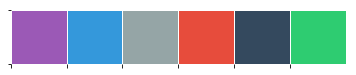

In [1]:
# Toolbox
import pandas as pd
import pandas_profiling
import numpy as np
import random
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p
from scipy import stats

# Misc
import os
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows =1000
pd.set_option('display.max_columns', 50)

# Set notebook colors and palette
flatui = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
sns.set_style('white')
sns.set_color_codes(palette='deep')
# Favorite code to use: #34995e

### Define functions

In [2]:
def pct_bar_labels():
    '''
    Function used to label the relative frequency on top of each bars
    '''
    # Set font size
    fs=15
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency (%)', fontsize=fs)
    plt.xticks(rotation=0, fontsize=fs)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=fs, color='black')

def freq_table(var):
    '''
    Define plot global variables
    Create a function that will populate a frequency table (%)
    Get counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get Values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100, 2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=(12,8))
    ax1.title.set_size(15)
    pct_bar_labels()
    plt.show()

### Set data directory

In [3]:
# Set directory
PATH = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\LargeData'
os.chdir(PATH)
os.getcwd()
os.listdir()

['19-credit-card-defaults.csv']

### Import data

In [4]:
data = pd.read_csv('19-credit-card-defaults.csv')

## Preprocessing / Exploratory Data Analysis

Let's take a look at the data and see the structure of the data. It's good to know how big our dataset is (200k+) so we are careful in using certain functions or plots and making sure we keep in mind our memory usage. Besides that, we will also be looking for missing values as well to get an idea on how complete the data is. We can create summary and diagnostic plots to show this. The less missing values the better and then clean up missing values and try to understand why are they missing in the first place.

In summary, some of the questions we try to answer here are:
- Are we able to use the data right away?
    - If not, why?
- Are there any missing values?
    - If not, what methods should we use to fix this?
- How clean is the data?
    - Are all values the same in a single feature?
    - Is the feature format consistent?

In [5]:
'''

Some basic functions:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''
print('')

In [6]:
# Top 5
data.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [7]:
data.shape

(284807, 31)

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Plot classes

0    0.998273
1    0.001727
Name: Class, dtype: float64


0    284315
1       492
Name: Class, dtype: int64

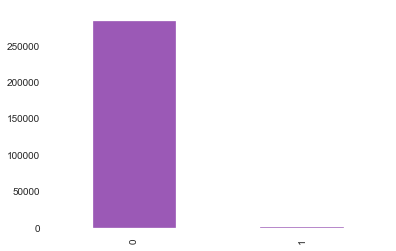

In [10]:
class_count = data.Class.value_counts()
print(data.Class.value_counts(normalize=True))
class_count.plot(kind='bar')
class_count

### Another view using the defined function

Frequency of Class :


,Count,Percentage
0,284315,99.83
1,492,0.17


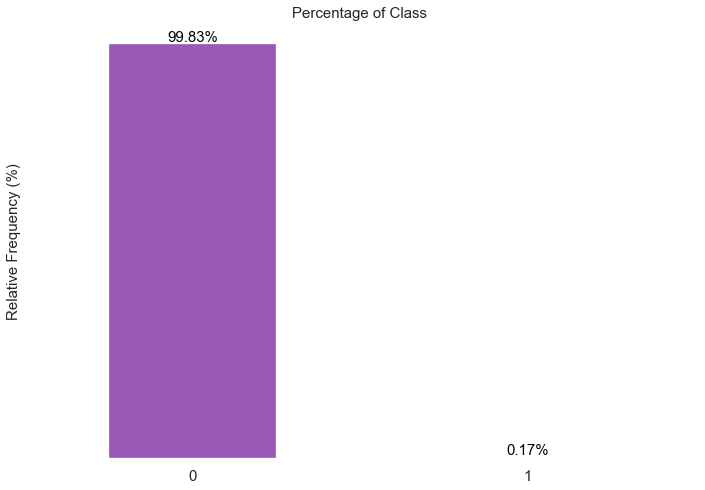

In [11]:
freq_table(data.Class)

As we can see from this chart alot, the distribution of classes are extremely imbalanced.

### Check for missing values

In [12]:
# Define a new function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

In [13]:
get_nulls(data)

There are 0 columns with missing values.


,Null Data Count,Null Data Pct


### Split the data into training and testing before anymore exploration

In [14]:
from sklearn.model_selection import train_test_split

# Define y/X
y = data.Class
X = data.drop('Class', axis=1)

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=100)

# Train - Validation Split
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.333, stratify=y_train,random_state=100)

In [15]:
# Combine y/X
train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check fraudulent transactions
print('Percentage of Fraud Transactions in train is: ', round(train.Class.mean(), 4))
print('Percentage of Fraud Transactions in validation is: ', round(validation.Class.mean(), 4))
print('Percentage of Fraud Transactions in test is: ', round(test.Class.mean(), 4))

Percentage of Fraud Transactions in train is:  0.0017
Percentage of Fraud Transactions in validation is:  0.0017
Percentage of Fraud Transactions in test is:  0.0017


Now we have all of our datasets set up, we can start exploring the train dataset and any feature changes we make on the train then we have to make on the validation and test set as well.

------

### Plot class vs. time

Time - Number of seconds elapsed between this transaction and the first transaction in the dataset

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,142228.0,94803.246006,47441.977924,0.0,54201.75,84708.5,139262.00,172788.0
1,246.0,84676.691057,49507.836311,406.0,41238.50,80456.0,133901.25,169966.0


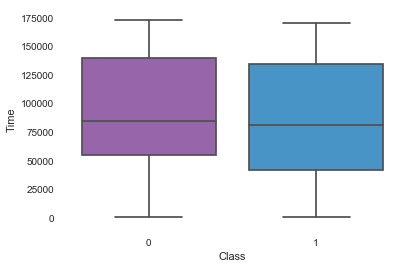

In [16]:
sns.boxplot(x='Class', y='Time',data=train)
train.groupby('Class').Time.describe()

Time is our first feature that is shown on the dataset, but from a visible view, it does not look like it determines the class very well as the distribution is pretty similar.

### Time by class

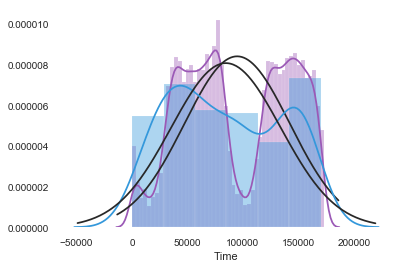

In [17]:
sns.distplot(train[train.Class==0].Time, fit=norm) # purple line
sns.distplot(train[train.Class==1].Time, fit=norm) # blue line

Bimodal shape; it's a little clunky but comparing it to the fraud transactions (blue line), the fraud transactions are more evenly distributed but it still does show a small bimodel shape.

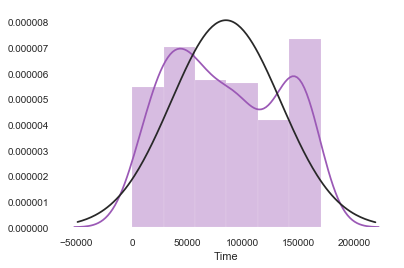

In [18]:
sns.distplot(train[train.Class==1].Time, fit=norm)

### Plot class vs. Amount

Amount - Transaction amount

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,142228.0,88.014690,242.198122,0.0,5.76,22.000,77.000,19656.53
1,246.0,119.199715,258.863938,0.0,1.00,9.955,105.425,2125.87


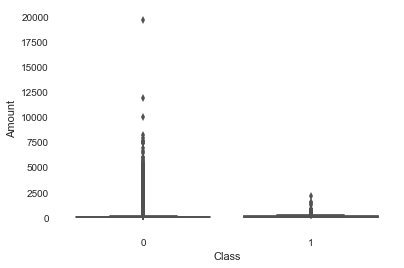

In [19]:
sns.boxplot(x='Class', y='Amount',data=train)
train.groupby('Class').Amount.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,71008.0,88.170064,242.212824,0.0,5.83,22.68,77.46,11789.84
1,123.0,129.600894,285.595570,0.0,1.00,7.59,102.75,1809.68


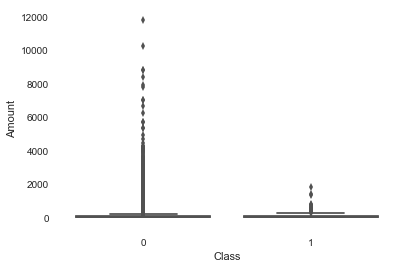

In [20]:
sns.boxplot(x='Class', y='Amount',data=validation)
validation.groupby('Class').Amount.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,71079.0,88.964796,272.441667,0.0,5.4,21.48,77.00,25691.16
1,123.0,120.844959,221.257769,0.0,1.0,22.04,137.62,1335.00


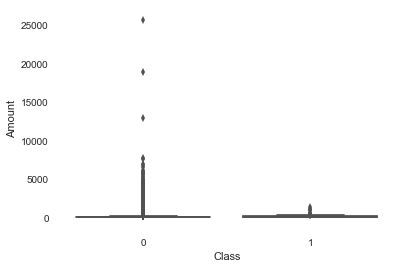

In [21]:
sns.boxplot(x='Class', y='Amount',data=test)
test.groupby('Class').Amount.describe()

It looks like the max fraud transaction amount is 2125.87. We can create a flag that would indicate if anything is above 2000 then we can flag it as a high amount. Usually fraud  transactions would want the amount to be lower and more under the radar so it makes sense the fraud amounts are on the lower end. 

### Create a new large value feature flag

In [22]:
# Define a new function to flag
def create_large_value(x):
    text=''
    if x>2000:
        text='Large'
    else:
        text='Small'
    return text

In [23]:
train['Large_Amount'] = train['Amount'].map(create_large_value)
validation['Large_Amount'] = validation['Amount'].map(create_large_value)
test['Large_Amount'] = test['Amount'].map(create_large_value)

### Correlation

Since all of our features are floats, we can create a correlation plot pretty easily.

In [ ]:
# Correlation to Class feature
pd.DataFrame(abs(train.corr()['Class']).sort_values(ascending=False))

,Class
Class,1.000000
V17,0.316437
V14,0.306215
V12,0.259364
V10,0.220973
V3,0.206779
V7,0.203591
V16,0.191292
V11,0.155909
V4,0.139400


Time and Amount features aren't very good at determining fraud but features: 17, 14, 12, 10, 3, and 7 all are above 20% which are decent numbers for a real dataset. They aren't extremely strong, but there is some correlation.

- In statistics, the correlation coefficient r measures the strength and direction of a linear relationship. don't get this mixed upwith coefficient of determination which is the r^2 which shows percentage of variation in y which is explained by the x variables.
    - when Pearson's r is close to 1 that means there is a strong relationship between the two variables
    - when Pearson's r is close to 0 that means there is a weak relationship between the two variables

### Coefficient of Determination (R-Squared)

Determine R^2

In [ ]:
# Top Features
r_squared = train.corr()**2
r_squared.Class.sort_values(ascending=False)

Class     1.000000
V17       0.100133
V14       0.093768
V12       0.067270
V10       0.048829
V3        0.042758
V7        0.041449
V16       0.036593
V11       0.024308
V4        0.019432
V1        0.012649
V18       0.011055
V9        0.010179
V5        0.009946
V2        0.009221
V6        0.002139
V19       0.001221
V21       0.001201
V20       0.000507
V8        0.000338
V26       0.000091
Time      0.000079
V27       0.000066
V24       0.000051
V13       0.000042
V23       0.000031
Amount    0.000029
V28       0.000017
V15       0.000013
V25       0.000002
V22       0.000001
Name: Class, dtype: float64

The coefficient of determination provides a 'goodness of fit' measure for the predictions to the observations. This is a value between 0 and 1. It's the proportion of the variance in the dependent variable (y) that is predictable from the independent variable (x).

There isn't a single numerical feature higher than 10% to the Class feature. We can make some assumptions that there isn't multicollinearity affecting the features, but we can create a heatmap to confrim this.

### Correlation heatmap

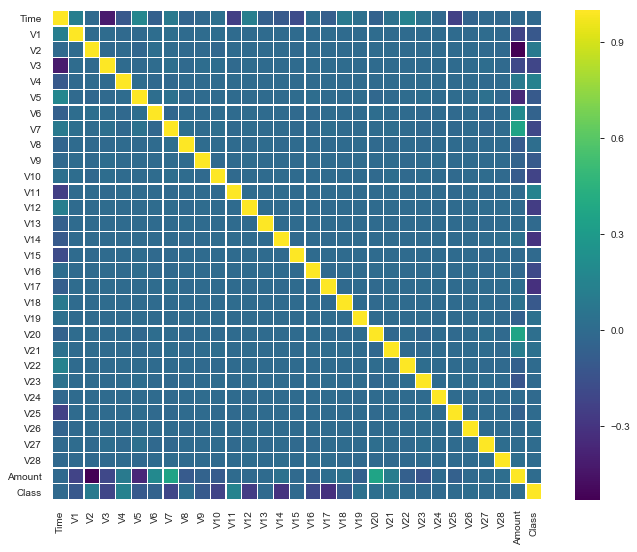

In [ ]:
# Create a figure space
plt.subplots(figsize=(12,9))

# Create matrix
corr_plot = sns.heatmap(train.corr(),
                          cmap='viridis', # YlGnBu, RdBu_r
                          linewidths=0.20,
                          linecolor='white',
                          vmax=1,
                          square=True,
                          fmt='.1g',
                          annot_kws={"size": 12})
corr_plot

There are some light green squared that may indicate multicollinearity like "Amount" and "V7" or "Amount" and "V20". Multicollinearity does look like in the clear from a visual perspective.

### Plotting all histograms

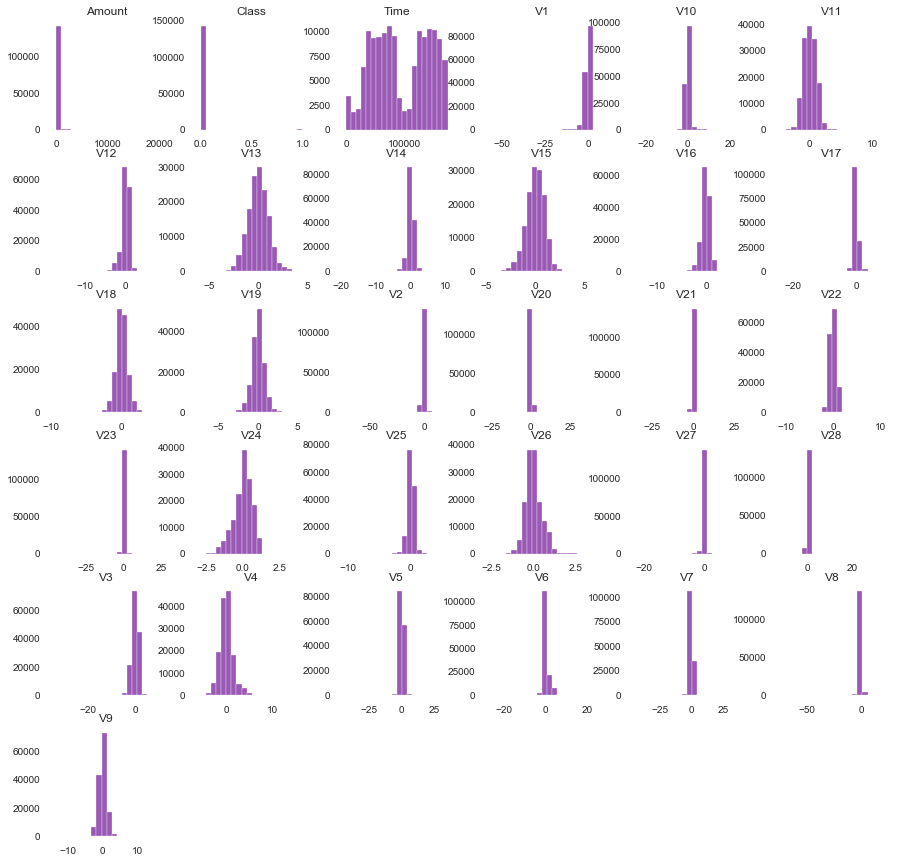

In [ ]:
sns.set_style('whitegrid')
ax = train.hist(bins=20, figsize=(15,15), grid=False)
plt.show()

Looks like Time is the only feature that is bimodel with the rest varying with skews or at zero. I think having geographic data can be extremely helpful but it would involve information regarding the account holder.

### Plotting distribution version with classes

<Figure size 432x288 with 0 Axes>

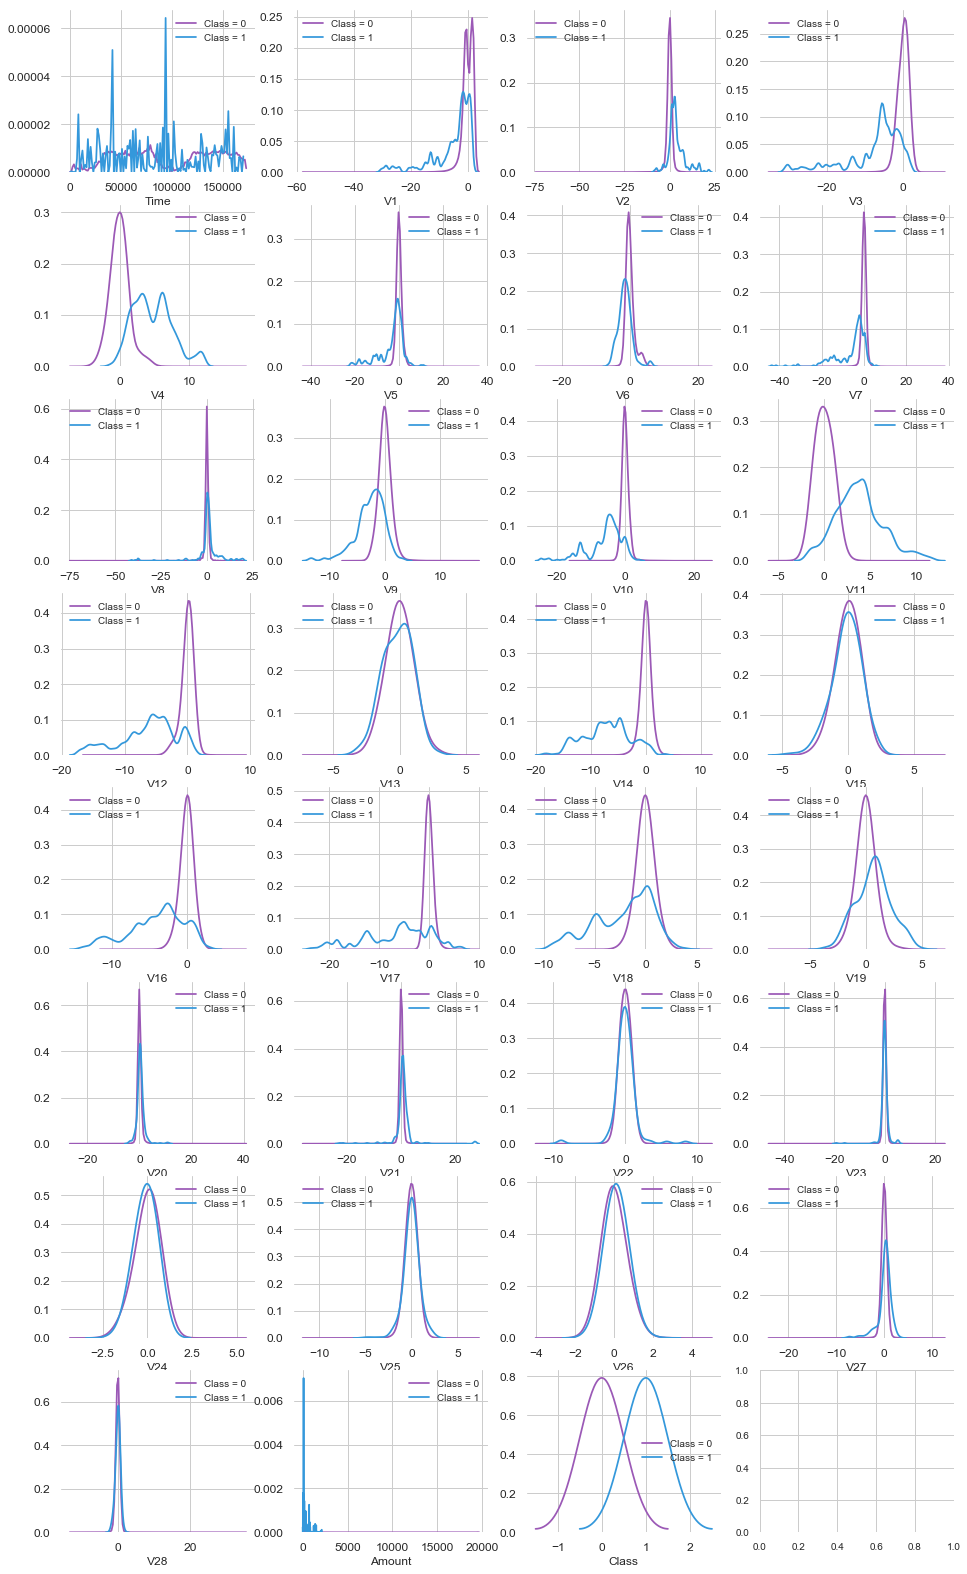

In [ ]:
var = train.drop('Large_Amount', axis=1).columns.values

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

# Set figure plot size
plt.figure()
fig, ax = plt.subplots(figsize=(16, 28), nrows=8, ncols=4)

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    
plt.show();

We can see some prime differences with the distributions especially with V12 through V14 along with V8 and V10. There is quite a distinct profile with some of these features but most of these are centerered around zero.

### PCA

I wanted to try out a dimensionality reduction algorithm, but for this dataset, features V1, V2, ... V28 are the principal components obtained with PCA already, which means they should also be scaled already.

### Pandas Profiling

As always, I like to add in pandas profiling just in case if I forgot anything. This is very handy. In a single line of code, it displays the data profiling report. Some of the information is pretty detailed. Check it out below. Beware, it does get pretty long.

In [ ]:
pandas_profiling.ProfileReport(train)

# # Output to a html file if needed
# profile = pandas_profiling.ProfileReport(train)
# profile.to_file(outputfile='House regression data profiling.html')

---------

## Modeling

If we don't have any more features to fix (missing values, strong outliers, etc.) or features to engineer then we can go straight into checking for additional skews before modeling.


### Check skews

In [24]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Loop through data types and append to list
numeric_list = []
for i in train.loc[:, train.columns != 'Class'].columns:
    if train[i].dtype in numeric_dtypes:
        numeric_list.append(i)

# Use apply to check skew
skew_features = train[numeric_list].apply(lambda x: skew(x)).sort_values(ascending=False)
skews_df = pd.DataFrame({'Skews': skew_features})
skews_df

,Skews
V28,13.772679
Amount,13.658460
V21,3.374329
V6,1.179066
V10,1.001399
V4,0.681841
V26,0.579393
V9,0.530478
V11,0.352610
V19,0.106381


### Skewness

For normally distributed data, the skewness should be close to 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution (positive).

### How many skewed features are there?

In [25]:
from scipy.stats import boxcox # Compute the Box-Cox transformation 

# Get high skews
high_skew = skew_features[skew_features>0.50]
skew_index = high_skew.index
print('There are {} skewed features.'.format(high_skew.shape[0]))

There are 8 skewed features.


In [26]:
train[skew_index].head()

,V28,Amount,V21,V6,V10,V4,V26,V9
96468,0.029410,58.98,0.081380,0.651332,0.013668,0.953520,-0.475257,0.083702
236359,-0.002344,9.72,-0.192737,-0.737483,-0.353052,-0.741430,0.157358,-0.282875
115541,0.163635,4.99,-0.301335,-1.038471,-0.180721,0.025436,0.079079,-0.105962
244665,-0.058687,59.95,0.201775,-0.480448,0.106141,-0.005613,0.787353,0.266174
59420,0.057952,113.60,0.210373,-0.416451,-0.129669,1.561857,-0.273857,0.685197


In [27]:
# # Get new transformed features
# new_skew_features = train[numeric_list].apply(lambda x: skew(x)).sort_values(ascending=False)
# new_skews_df = pd.DataFrame({'Skew': new_skew_features})
# new_skews_df

### Drop features

In [28]:
train = train.drop('Large_Amount', axis=1)
validation = validation.drop('Large_Amount', axis=1)
test = test.drop('Large_Amount', axis=1)

### Split X & y Features

Data was split in the beginning of the notebook. So all we need to do right now is to split the X and y variables before we begin modeling.

### SMOTE

Now that we have checked the initial models with the full dataset and the undersampled dataset, we will use SMOTE. There are specific techniques, such as SMOTE and ADASYN, designed to strategically sample unbalanced datasets. In our case, let’s under-sample in order to achieve an even split between fraud and valid transactions. It will make the training set pretty small, but the algorithm doesn’t need a lot of data to come up with a good classifier.

We will design a new train, validation, and test sets for undersampled data to have the same counts for fraud.

In [29]:
train_fraud_count = train[train.Class==1].Class.sum()
validation_fraud_count = validation[validation.Class==1].Class.sum()
test_fraud_count = test[test.Class==1].Class.sum()

print('Train Fraud Count: ', train_fraud_count)
print('Validation Fraud Count: ', validation_fraud_count)
print('Test Fraud Count: ', test_fraud_count)

Train Fraud Count:  246
Validation Fraud Count:  123
Test Fraud Count:  123


In [30]:
# Shuffle
train = train.sample(frac=1, random_state=100)

# Get same amount of fraud / non-fraud and concat
fraud_train = train.loc[train['Class'] == 1]
non_fraud_train = train.loc[train['Class'] == 0][:train_fraud_count]
combined_under_train = pd.concat([fraud_train, non_fraud_train])
combined_under_train = combined_under_train.sample(frac=1, random_state=100)

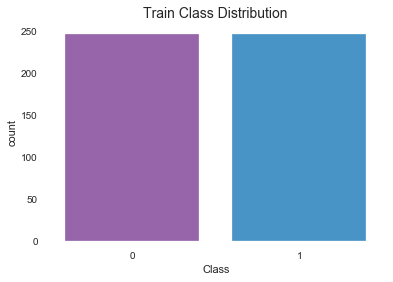

In [31]:
# Check
sns.countplot('Class', data=combined_under_train)
plt.title('Train Class Distribution', fontsize=14)
plt.show()

In [32]:
# Shuffle
validation = validation.sample(frac=1, random_state=100)

# Get same amount of fraud / non-fraud and concat
fraud_validation = validation.loc[validation['Class'] == 1]
non_fraud_validation = validation.loc[validation['Class'] == 0][:validation_fraud_count]
combined_under_validation = pd.concat([fraud_validation, non_fraud_validation])
combined_under_validation = combined_under_validation.sample(frac=1, random_state=100)

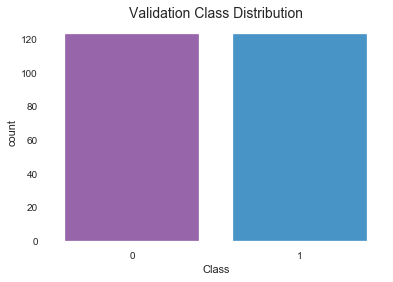

In [33]:
# Check
sns.countplot('Class', data=combined_under_validation)
plt.title('Validation Class Distribution', fontsize=14)
plt.show()

In [34]:
# Shuffle
test = test.sample(frac=1, random_state=100)

# Get same amount of fraud / non-fraud and concat
fraud_test = test.loc[test['Class'] == 1]
non_fraud_test = test.loc[test['Class'] == 0][:test_fraud_count]
combined_under_test = pd.concat([fraud_test, non_fraud_test])
combined_under_test = combined_under_test.sample(frac=1, random_state=100)

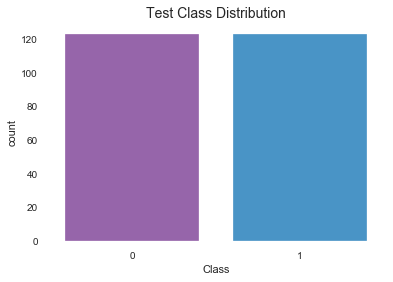

In [35]:
# Check
sns.countplot('Class', data=combined_under_test)
plt.title('Test Class Distribution', fontsize=14)
plt.show()

### Full dataset split

In [36]:
# X features
X_train = train.drop('Class', axis=1)
X_validation = validation.drop('Class', axis=1)
X_test = test.drop('Class', axis=1)

# Y feature
y_train = train.Class
y_validation = validation.Class
y_test = test.Class

In [37]:
X_validation.shape

(71131, 30)

In [38]:
y_test.shape

(71202,)

### Under-sampling split

In [39]:
# X features
X_under_train = combined_under_train.drop('Class', axis=1)
X_under_validation = combined_under_validation.drop('Class', axis=1)
X_under_test = combined_under_test.drop('Class', axis=1)

# Y feature
y_under_train = combined_under_train.Class
y_under_validation = combined_under_validation.Class
y_under_test = combined_under_test.Class

### Loading models

In [64]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 

# Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve, auc

### Dummy variable

Get dummy variable if there any.

In [41]:
X_train = pd.get_dummies(X_train).reset_index(drop=True) 
X_validation = pd.get_dummies(X_validation).reset_index(drop=True) 
X_test = pd.get_dummies(X_test).reset_index(drop=True) 

In [42]:
X_under_train = pd.get_dummies(X_under_train).reset_index(drop=True) 
X_under_validation = pd.get_dummies(X_under_validation).reset_index(drop=True) 
X_under_test = pd.get_dummies(X_under_test).reset_index(drop=True) 

### Scaling the full set

In [43]:
scaler = StandardScaler()

# Transform the variables to be on the same scale
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

### Scaling the under set

In [44]:
scaler = StandardScaler()

# Transform the variables to be on the same scale
X_under_train_scaled = scaler.fit_transform(X_under_train)
X_under_validation_scaled = scaler.transform(X_under_validation)
X_under_test_scaled = scaler.transform(X_under_test)

### Logistic Regression (Pre-SMOTE)

99% is not going to really mean anything we are are not capturing the false positives and false negatives metrics.

In [45]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_scaled, y_train)
lr_score = cross_val_score(lr, X_train_scaled, y_train, cv=5)

In [46]:
lr_score.mean()

0.9991787954160201

### Sample function for confusion matrix

In [47]:
def PrintStats(cmat, y_test, pred):
    # separate out the confusion matrix components
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]
    # calculate F!, Recall scores
    f1Score = round(f1_score(y_test, pred), 2)
    recallScore = round(recall_score(y_test, pred), 2)
    # calculate and display metrics
    print(cmat)
    print( 'Accuracy: '+ str(np.round(100*float(tpos+fneg)/float(tpos+fneg + fpos + tneg),2))+'%')
    print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, pred),3)))
    print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
    print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))

In [48]:
def run_under_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [49]:
cmat, pred = run_under_model(lr, X_under_train_scaled, y_under_train, X_under_test_scaled, y_under_test)

In [50]:
PrintStats(cmat, y_under_test, pred)

[[120   3]
 [ 19 104]]
Accuracy: 91.06%
Cohen Kappa: 0.821
Sensitivity/Recall for Model : 0.85
F1 Score for Model : 0.9


Under set's evaluation metrics are not bad. Also know that we can look at accuracy in this dataset since it's balanced. But in terms of understanding what "fraud" means is that the company will have higher risks if there are flagging issues so identifying the true frauds are still going to be the primary metric to use if we want to make make a business decision from it.

### Check full dataset

Sensitivity should be a lot lower in the bigger dataset.

In [51]:
cmat, pred = run_under_model(lr, X_train_scaled, y_train, X_test_scaled, y_test)

In [52]:
PrintStats(cmat, y_test, pred)

[[71067    12]
 [   54    69]]
Accuracy: 99.91%
Cohen Kappa: 0.676
Sensitivity/Recall for Model : 0.56
F1 Score for Model : 0.68


### Plotting the F1 learning curve for logistic regression

In [53]:
# Import learning_curve() function
from sklearn.model_selection import learning_curve

# Define function
seed=100
def plot_learning_curve(model, X_train, y_train):
    
    # Create a feature matrix and target vector
    X, y = X_train, y_train
    
    # Create cross-validation training and test scores
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10,
                                                            scoring='f1', n_jobs=-1, 
                                                            train_sizes=np.linspace(0.01, 1.0, 15),
                                                            random_state=seed)
        
    # Create mean and standard deviation of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create mean and standard deviation of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean,'o-', color='red',  label='Training Score')
    plt.plot(train_sizes, test_mean,'o-', color='green', label='Cross-Validation Score')
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
   
    # Create plot
    font_size = 15
    plt.xlabel('Training Set Size', fontsize=font_size)
    plt.ylabel('F1 Score', fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(loc='best')
    plt.grid()

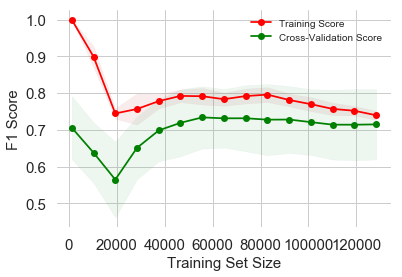

In [54]:
plot_learning_curve(lr, X_train_scaled, y_train)

### Precision-Recall Curve

In [55]:
# Call model object (using glm() since a logistic regression is basically a generalized linear regression) 
lr = LogisticRegression(solver='liblinear')

# Fit the model with X_train, y_train
lr.fit(X_under_train_scaled, y_under_train)

# Once trained, find out how the model has performed
y_pred = lr.predict(X_under_validation_scaled)

# Get y_score by LogisticRegression().decision_function(test)
y_score = lr.decision_function(X_under_validation_scaled)

print('Logistic Regression Validation Set:')
print("Precision:", precision_score(y_under_validation, y_pred))
print("Recall:", recall_score(y_under_validation, y_pred))
print("F1 Score:", f1_score(y_under_validation, y_pred))

Logistic Regression Validation Set:
Precision: 0.9824561403508771
Recall: 0.9105691056910569
F1 Score: 0.9451476793248944


In [56]:
# Once trained, find out how the model has performed
y_pred = lr.predict(X_under_test_scaled)

# Get y_score by LogisticRegression().decision_function(test)
y_score = lr.decision_function(X_under_test_scaled)

print('Logistic Regression Test Set:')
print("Precision:", precision_score(y_under_test, y_pred))
print("Recall:", recall_score(y_under_test, y_pred))
print("F1 Score:", f1_score(y_under_test, y_pred))

Logistic Regression Test Set:
Precision: 0.9719626168224299
Recall: 0.8455284552845529
F1 Score: 0.9043478260869565


### Full dataset pr curve

Logistic Regression Validation Set:
Precision: 0.9146341463414634
Recall: 0.6097560975609756
F1 Score: 0.7317073170731707


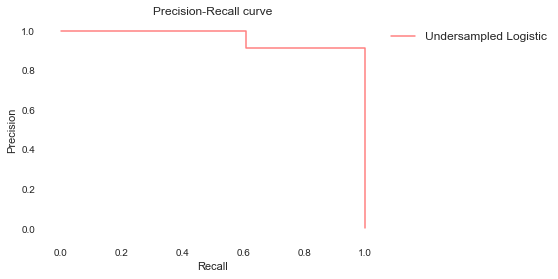

In [57]:
# Call model object (using glm() since a logistic regression is basically a generalized linear regression) 
lr = LogisticRegression(solver='liblinear')

# Fit the model with X_train, y_train
lr.fit(X_train_scaled, y_train)

# Once trained, find out how the model has performed
y_pred = lr.predict(X_validation_scaled)

# Get y_score by LogisticRegression().decision_function(test)
y_score = lr.decision_function(X_validation_scaled)

print('Logistic Regression Validation Set:')
print("Precision:", precision_score(y_validation, y_pred))
print("Recall:", recall_score(y_validation, y_pred))
print("F1 Score:", f1_score(y_validation, y_pred))

original_precision, original_recall, original_thresholds = precision_recall_curve(y_validation, y_pred)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Undersampled Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

### Define a function for the undersampled dataset

In [58]:
# Define new function
def pr_curve(model, X_train, y_train, title):
    
    # Get model probabilities
    probability = model.predict_proba(X_train)[:, 1]
    
    # Create figure space
    plt.figure(figsize=(8, 5))
    
    # Get precision, recall, threshold values using precision_recall_curve() function
    precision, recall, threshold = precision_recall_curve(y_train, probability)
    PR_AUC = auc(recall, precision)
    
    # Plot precision & recall
    plt.plot(recall, precision, 'r-', lw=4, label='PR Curve (area = %0.2f)' % PR_AUC)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.show()

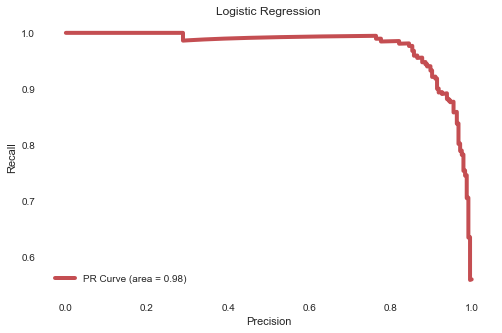

In [59]:
pr_curve(lr, X_under_train_scaled, y_under_train, 'Logistic Regression')

### Full dataset

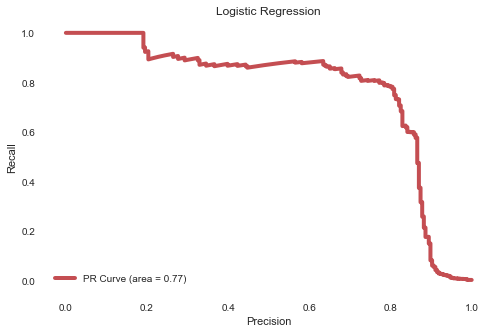

In [60]:
pr_curve(lr, X_train_scaled, y_train, 'Logistic Regression')

### What's next?

We tried out logistic regression on the full dataset and the SMOTE dataset and have gotten different results completely since the one dataset is balanced and another is not. We can try to make this process a lot more efficient by using pipeline and cv together along with using the imblearn library for imbalanced datasets.

Not only that, we can also oversample vs. undersampling so we have high number of frauds and compare the results between the two datasets.

SMOTE(Synthetic Minority Over-sampling Technique) generates new samples similiar but not typically identical of minority classes, since the algorithm takes nearby instances of same class into account. Also FYI, SMOTE happens during Cross Validation not before. 

In [61]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [63]:
sm = SMOTE(kind='regular', sampling_strategy='minority', random_state=100)
X_res, y_res = sm.fit_sample(X_train_scaled, y_train)
pd.value_counts(y_res)

1    142228
0    142228
dtype: int64

### Predict and Evaluate - Resampled set

Ran into an annoying error using pipeline. You have to specify the parameter names with "__".

    https://datascience.stackexchange.com/questions/43947/c-parameter-error-in-pipeline
    

In [100]:
# Logistic regression
lr = LogisticRegression()
# SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=100)

# Use imblearn's pipeline vs. sklearn
from imblearn.pipeline import Pipeline
pipeline = Pipeline([
    ('sampling', sm),
    ('logreg', LogisticRegression())])

# Parameters
lr_params = {'logreg__penalty': ['l1', 'l2'], 'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 250, 500]}

In [103]:
from tqdm import tqdm

# Randomized search pipeline
for cv in tqdm(range(4, 6)):
    
    # Randomized cv
    lr_random_search = GridSearchCV(pipeline,
                                    param_grid=lr_params,
                                    cv=cv,
                                    scoring='f1',
                                    n_jobs=-1,
                                    verbose=0)
    # Fit the data
    lr_random_search.fit(X_under_train_scaled, y_under_train)
    
    # Print score
    print('Score for {} fold CV: = {}%'.format(cv, lr_random_search.score(X_under_validation, y_under_validation)))
    # Print parameters
    print('Best parameters:')
    print(lr_random_search.best_params_)

print('Finished.')

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\Users\David Ly\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score for 4 fold CV: = 0.0%
Best parameters:
{'logreg__C': 1, 'logreg__penalty': 'l1'}


 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.51it/s]

Score for 5 fold CV: = 0.0%
Best parameters:
{'logreg__C': 1, 'logreg__penalty': 'l1'}


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.34it/s]


Finished.


### Works Cited

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. [Calibrating Probability with Undersampling for Unbalanced Classification](https://www.researchgate.net/publication/283349138_Calibrating_Probability_with_Undersampling_for_Unbalanced_Classification). In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. [Learned lessons in credit card fraud detection from a practitioner perspective](https://www.researchgate.net/publication/260837261_Learned_lessons_in_credit_card_fraud_detection_from_a_practitioner_perspective), Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. [Credit card fraud detection: a realistic modeling and a novel learning strategy](https://www.researchgate.net/publication/319867396_Credit_Card_Fraud_Detection_A_Realistic_Modeling_and_a_Novel_Learning_Strategy), IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea. [Adaptive Machine learning for credit card fraud detection](http://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf) ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. [Scarff: a scalable framework for streaming credit card fraud detection with Spark](https://www.researchgate.net/publication/319616537_SCARFF_a_Scalable_Framework_for_Streaming_Credit_Card_Fraud_Detection_with_Spark), Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. [Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi. [Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi. [Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection](https://www.researchgate.net/publication/333143698_Combining_Unsupervised_and_Supervised_Learning_in_Credit_Card_Fraud_Detection), Information Sciences, 2019